<a href="https://colab.research.google.com/github/aravind598/Data_Science_Proj/blob/master/Data%20Science%20Project/Dectrees_Categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [0]:
#Run This

In [0]:
  import numpy as np
  import pandas as pd
  import seaborn as sb
  import matplotlib.pyplot as plt # we only need pyplot
  sb.set() # set the default Seaborn style for graphics
  import statsmodels.api as sm
  %matplotlib inline
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.feature_selection import RFE
  from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
  from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import metrics
  from sklearn.metrics import classification_report
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  from sklearn.tree import export_graphviz
  from sklearn.model_selection import GridSearchCV
  import graphviz
  import plotly.offline as py
  import plotly.figure_factory as ff
  import plotly.graph_objs as go
  from plotly.subplots import make_subplots
  from plotly import tools
  import cufflinks as cf

# Data Section

In [0]:
#Run This Very Important

In [0]:
url = 'https://raw.githubusercontent.com/aravind598/Github/aravind598/train_labels.csv?token=ANW7SFFLH4MDRNIQ6CZDX4K6Q34HM'
urll = 'https://raw.githubusercontent.com/aravind598/Github/aravind598/train_values.csv?token=ANW7SFAFKK4PCQRTQ4VAZOC6Q34HS'
url2 = 'https://raw.githubusercontent.com/aravind598/Github/aravind598/test_values.csv?token=ANW7SFDQHUPFIZR3Q5NVDWS6Q5PNG'

In [0]:
#Run This Very important

In [0]:
df1 = pd.read_csv(url)
df2 = pd.read_csv(urll)
df3 = pd.merge(df2,df1)
test_data = pd.read_csv(url2)


In [0]:
numericdata = pd.DataFrame(df3[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id',	'count_floors_pre_eq',	'age',	'area_percentage',	'height_percentage',
                            'has_superstructure_adobe_mud',	'has_superstructure_mud_mortar_stone',	
                            'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick',	
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered',	'has_superstructure_other',	'count_families',	'has_secondary_use',	
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel',	'has_secondary_use_rental',	'has_secondary_use_institution',	
                            'has_secondary_use_school',	'has_secondary_use_industry',	'has_secondary_use_health_post',	'has_secondary_use_gov_office',	
                            'has_secondary_use_use_police',	'has_secondary_use_other', 'damage_grade']])

catData = pd.DataFrame(df3[['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']])

numeric_testdata = pd.DataFrame(test_data[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id',	'count_floors_pre_eq',	'age',	'area_percentage',	'height_percentage',
                            'has_superstructure_adobe_mud',	'has_superstructure_mud_mortar_stone',	
                            'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick',	
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered',	'has_superstructure_other',	'count_families',	'has_secondary_use',	
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel',	'has_secondary_use_rental',	'has_secondary_use_institution',	
                            'has_secondary_use_school',	'has_secondary_use_industry',	'has_secondary_use_health_post',	'has_secondary_use_gov_office',	
                            'has_secondary_use_use_police',	'has_secondary_use_other']])

numtrain = pd.DataFrame(df3[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id',	'count_floors_pre_eq',	'age',	'area_percentage',	'height_percentage',
                            'has_superstructure_adobe_mud',	'has_superstructure_mud_mortar_stone',	
                            'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick',	
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered',	'has_superstructure_other',	'count_families',	'has_secondary_use',
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel',	'has_secondary_use_rental',	'has_secondary_use_institution',	
                            'has_secondary_use_school',	'has_secondary_use_industry',	'has_secondary_use_health_post',	'has_secondary_use_gov_office',	
                            'has_secondary_use_use_police',	'has_secondary_use_other']])
alldata = pd.DataFrame(df3[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id'	,'count_floors_pre_eq',	'age'	,'area_percentage',	'height_percentage'	,'land_surface_condition'	,
                            'foundation_type',	'roof_type',	'ground_floor_type'	,'other_floor_type'	,'position'	,'plan_configuration',	'has_superstructure_adobe_mud',	
                            'has_superstructure_mud_mortar_stone'	,'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick'	,
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',	
                            'has_superstructure_rc_engineered'	, 'has_superstructure_other',	'legal_ownership_status',	'count_families',	'has_secondary_use',	
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel'	,'has_secondary_use_rental'	,'has_secondary_use_institution',	'has_secondary_use_school',
                            'has_secondary_use_industry','has_secondary_use_health_post',	'has_secondary_use_gov_office',	'has_secondary_use_use_police',	'has_secondary_use_other']])
#With Categorical Values as Dummmies
xingdata = pd.DataFrame(pd.get_dummies(catData, columns=catData.columns, drop_first=True))
lastData = numtrain.join(xingdata)


numtest = pd.DataFrame(test_data)
num = round(0.8*len(numtrain.index))
no = len(numtrain.index) - num
dog = num + no



In [0]:
print(len(df3))
df3.head()

260601


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [0]:
df3.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [0]:
numtrain.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
lastData.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_o,land_surface_condition_t,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_q,roof_type_x,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_o,position_s,position_t,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [0]:
test_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


# Categorical Section DECTREES

In [0]:
catData = pd.DataFrame(df3[['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration']])

In [0]:
#land_surface_condition

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'max_depth': 2}
2
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5694619653589535

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5667114351496546

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4996
           2       0.57      1.00      0.72     29537
           3       0.00      0.00      0.00     17587

    accuracy                           0.57     52120
   macro avg       0.19      0.33      0.24     52120
weighted avg       0.32      0.57      0.41     52120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


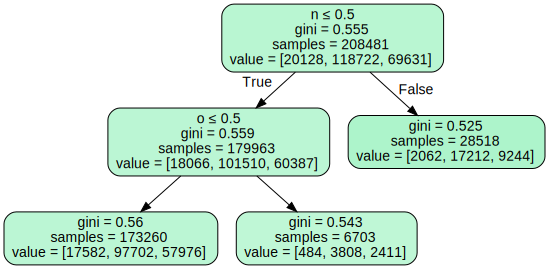

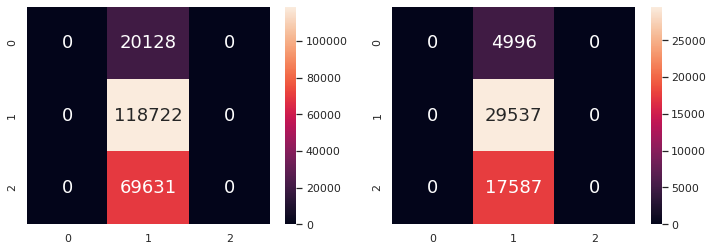

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
land_surface_condition = pd.DataFrame(mlb.fit_transform(catData['land_surface_condition']),columns=mlb.classes_)

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y_land = pd.DataFrame(df3['damage_grade'])
X_land = pd.DataFrame(land_surface_condition)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
Xland_train, Xland_test, yland_train, yland_test = train_test_split(X_land, y_land, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': range(2, 11)}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params)                  

locally_best_tree.fit(Xland_train, yland_train)
print("Best parameters:", locally_best_tree.best_params_)
best_param = locally_best_tree.best_params_['max_depth']
print(best_param)
graphviz.Source(treedot)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = best_param)  # create the decision tree object
dectree.fit(Xland_train, yland_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
yland_train_pred = dectree.predict(Xland_train)
yland_test_pred = dectree.predict(Xland_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_train, yland_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_test, yland_test))
print()

#Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(yland_test, yland_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(yland_train, yland_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yland_test, yland_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = Xland_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript
graphviz.Source(treedot)

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5618305744888024

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5645817344589409

Accuracy: 0.5645817344589409


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.00      0.00      0.00     20068
           2       0.57      0.97      0.72    118528
           3       0.36      0.03      0.06     69885

    accuracy                           0.56    208481
   macro avg       0.31      0.33      0.26    208481
weighted avg       0.44      0.56      0.43    208481

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5056
           2       0.57      0.97      0.72     29731
           3       0.37      0.04      0.06     17333

    accuracy                           0.56     52120
   macro avg       0.31      0.33      0.26     52120
weighted avg       0.45      0.56      0.43     52120



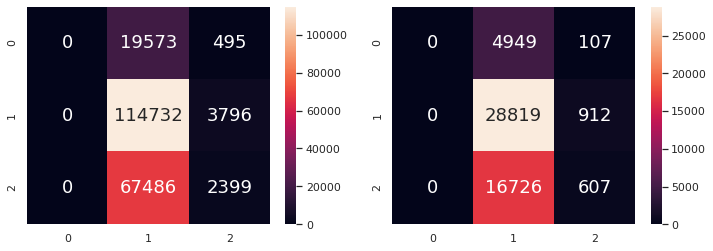

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
land_surface_condition = pd.DataFrame(mlb.fit_transform(catData['land_surface_condition']),columns=mlb.classes_)

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = land_surface_condition

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#foundation_type

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'max_depth': 2}
2
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5750691909574493

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5759401381427475

              precision    recall  f1-score   support

           1       0.55      0.23      0.33      4934
           2       0.58      0.97      0.72     29747
           3       0.00      0.00      0.00     17439

    accuracy                           0.58     52120
   macro avg       0.38      0.40      0.35     52120
weighted avg       0.38      0.58      0.44     52120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


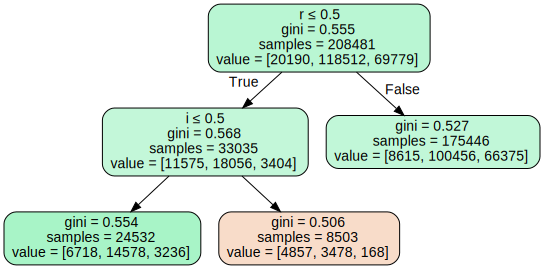

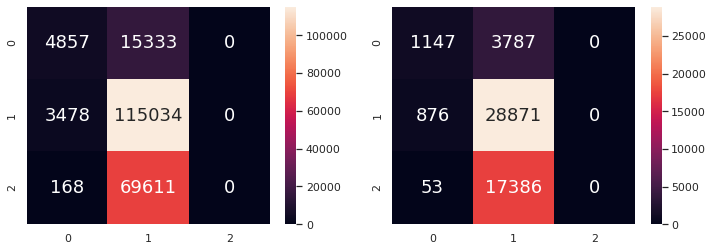

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
foundation_type = pd.DataFrame(mlb.fit_transform(catData['foundation_type']),columns=mlb.classes_)

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y_found = pd.DataFrame(df3['damage_grade'])
X_found = pd.DataFrame(foundation_type)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
Xland_train, Xland_test, yland_train, yland_test = train_test_split(X_found, y_found, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': range(2, 11)}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params)                  

locally_best_tree.fit(Xland_train, yland_train)
print("Best parameters:", locally_best_tree.best_params_)
best_param = locally_best_tree.best_params_['max_depth']
print(best_param)
graphviz.Source(treedot)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = best_param)  # create the decision tree object
dectree.fit(Xland_train, yland_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
yland_train_pred = dectree.predict(Xland_train)
yland_test_pred = dectree.predict(Xland_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_train, yland_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_test, yland_test))
print()

#Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(yland_test, yland_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(yland_train, yland_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yland_test, yland_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = Xland_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript
graphviz.Source(treedot)

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.37323305241245003

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3751534919416731

Accuracy: 0.3751534919416731


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.35      0.57      0.43     20128
           2       0.00      0.00      0.00    118648
           3       0.38      0.95      0.54     69705

    accuracy                           0.37    208481
   macro avg       0.24      0.51      0.32    208481
weighted avg       0.16      0.37      0.22    208481

              precision    recall  f1-score   support

           1       0.35      0.58      0.43      4996
           2       0.00      0.00      0.00     29611
           3       0.38      0.95      0.54     17513

    accuracy                           0.38     52120
   macro avg       0.24      0.51      0.33     52120
weighted avg       0.16      0.38      0.22     52120



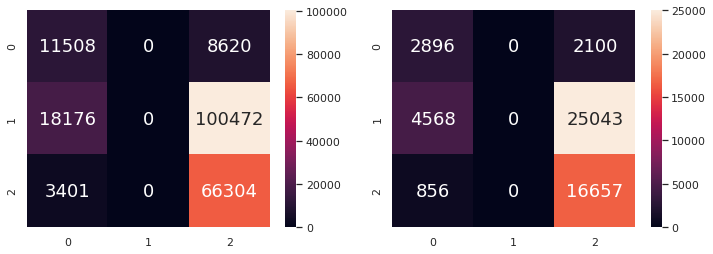

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
foundation_type = pd.DataFrame(mlb.fit_transform(catData['foundation_type']),columns=mlb.classes_)

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = foundation_type

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#roof_type

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'max_depth': 2}
2
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5687232889328044

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5696661550268611

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5127
           2       0.57      1.00      0.73     29691
           3       0.00      0.00      0.00     17302

    accuracy                           0.57     52120
   macro avg       0.19      0.33      0.24     52120
weighted avg       0.32      0.57      0.41     52120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


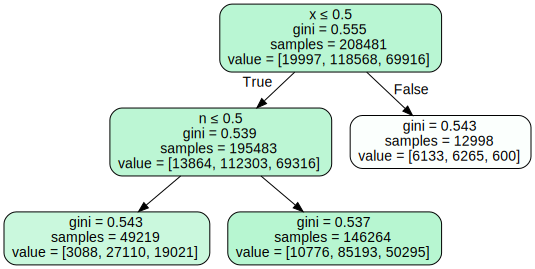

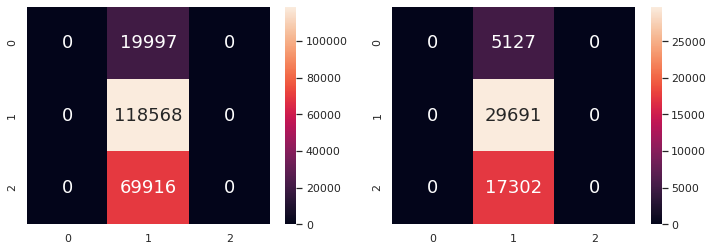

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
roof_type = pd.DataFrame(mlb.fit_transform(catData['roof_type']),columns=mlb.classes_)

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y_roof = pd.DataFrame(df3['damage_grade'])
X_roof = pd.DataFrame(roof_type)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
Xland_train, Xland_test, yland_train, yland_test = train_test_split(X_roof, y_roof, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': range(2, 11)}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params)                  

locally_best_tree.fit(Xland_train, yland_train)
print("Best parameters:", locally_best_tree.best_params_)
best_param = locally_best_tree.best_params_['max_depth']
print(best_param)
graphviz.Source(treedot)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = best_param)  # create the decision tree object
dectree.fit(Xland_train, yland_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
yland_train_pred = dectree.predict(Xland_train)
yland_test_pred = dectree.predict(Xland_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_train, yland_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_test, yland_test))
print()

#Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(yland_test, yland_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(yland_train, yland_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yland_test, yland_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = Xland_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript
graphviz.Source(treedot)

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.3621097366186847

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3577705295471988

Accuracy: 0.3577705295471988


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.48      0.30      0.37     20207
           2       0.00      0.00      0.00    118351
           3       0.35      0.99      0.52     69923

    accuracy                           0.36    208481
   macro avg       0.28      0.43      0.30    208481
weighted avg       0.17      0.36      0.21    208481

              precision    recall  f1-score   support

           1       0.46      0.31      0.37      4917
           2       0.00      0.00      0.00     29908
           3       0.35      0.99      0.52     17295

    accuracy                           0.36     52120
   macro avg       0.27      0.43      0.30     52120
weighted avg       0.16      0.36      0.21     52120



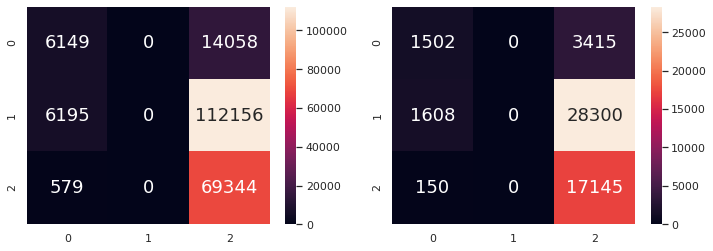

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
roof_type = pd.DataFrame(mlb.fit_transform(catData['roof_type']),columns=mlb.classes_)


# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = roof_type

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#ground_floor_type

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'max_depth': 2}
2
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5748101745482802

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5769762087490407

              precision    recall  f1-score   support

           1       0.57      0.24      0.34      5077
           2       0.58      0.97      0.72     29731
           3       0.00      0.00      0.00     17312

    accuracy                           0.58     52120
   macro avg       0.38      0.40      0.35     52120
weighted avg       0.38      0.58      0.45     52120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


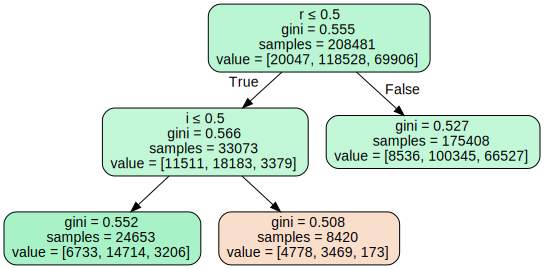

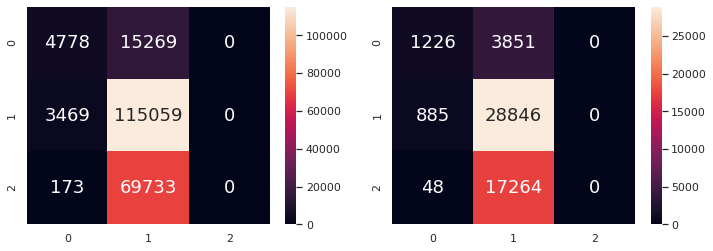

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
ground_floor_type = pd.DataFrame(mlb.fit_transform(catData['ground_floor_type']),columns=mlb.classes_)

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y_ground = pd.DataFrame(df3['damage_grade'])
X_ground = pd.DataFrame(foundation_type)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
Xland_train, Xland_test, yland_train, yland_test = train_test_split(X_ground, y_ground, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': range(2, 11)}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params)                  

locally_best_tree.fit(Xland_train, yland_train)
print("Best parameters:", locally_best_tree.best_params_)
best_param = locally_best_tree.best_params_['max_depth']
print(best_param)
graphviz.Source(treedot)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = best_param)  # create the decision tree object
dectree.fit(Xland_train, yland_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
yland_train_pred = dectree.predict(Xland_train)
yland_test_pred = dectree.predict(Xland_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_train, yland_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_test, yland_test))
print()

#Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(yland_test, yland_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(yland_train, yland_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yland_test, yland_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = Xland_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript
graphviz.Source(treedot)

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.39286553690744

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3932655410590944

Accuracy: 0.3932655410590944
              precision    recall  f1-score   support

           1       0.41      0.42      0.41     20011
           2       0.59      0.10      0.17    118723
           3       0.37      0.89      0.52     69747

    accuracy                           0.39    208481
   macro avg       0.45      0.47      0.37    208481
weighted avg       0.50      0.39      0.31    208481

              precision    recall  f1-score   support

           1       0.41      0.42      0.41      5113
           2       0.58      0.10      0.17     29536
           3       0.37      0.88      0.52     17471

    accuracy                           0.39     52120
   macro avg       0.45      0.47      0.37     52120
weighted avg       0.49      0.39  

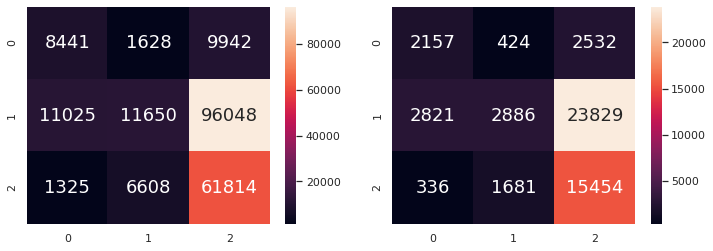

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
ground_floor_type = pd.DataFrame(mlb.fit_transform(catData['ground_floor_type']),columns=mlb.classes_)

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = ground_floor_type

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#other_floor_type

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'max_depth': 2}
2
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5694955415601421

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5665771297006907

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4993
           2       0.57      1.00      0.72     29530
           3       0.00      0.00      0.00     17597

    accuracy                           0.57     52120
   macro avg       0.19      0.33      0.24     52120
weighted avg       0.32      0.57      0.41     52120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


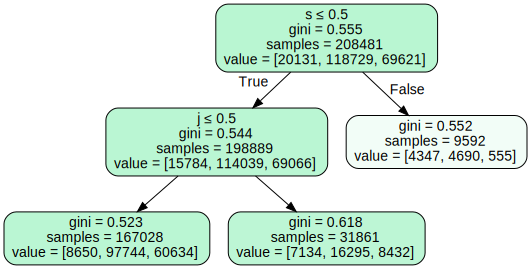

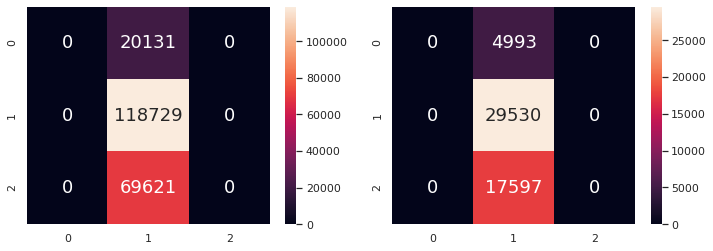

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
other_floor_type = pd.DataFrame(mlb.fit_transform(catData['other_floor_type']),columns=mlb.classes_)

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y_other = pd.DataFrame(df3['damage_grade'])
X_other = pd.DataFrame(other_floor_type)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
Xland_train, Xland_test, yland_train, yland_test = train_test_split(X_other, y_other, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': range(2, 11)}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params)                  

locally_best_tree.fit(Xland_train, yland_train)
print("Best parameters:", locally_best_tree.best_params_)
best_param = locally_best_tree.best_params_['max_depth']
print(best_param)
graphviz.Source(treedot)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = best_param)  # create the decision tree object
dectree.fit(Xland_train, yland_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
yland_train_pred = dectree.predict(Xland_train)
yland_test_pred = dectree.predict(Xland_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_train, yland_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_test, yland_test))
print()

#Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(yland_test, yland_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(yland_train, yland_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yland_test, yland_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = Xland_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript
graphviz.Source(treedot)

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.34713475088857015

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3426707597851113

Accuracy: 0.3426707597851113


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.28      0.57      0.37     20153
           2       0.00      0.00      0.00    118421
           3       0.36      0.87      0.51     69907

    accuracy                           0.35    208481
   macro avg       0.21      0.48      0.30    208481
weighted avg       0.15      0.35      0.21    208481

              precision    recall  f1-score   support

           1       0.27      0.56      0.36      4971
           2       0.00      0.00      0.00     29838
           3       0.36      0.87      0.51     17311

    accuracy                           0.34     52120
   macro avg       0.21      0.48      0.29     52120
weighted avg       0.15      0.34      0.20     52120



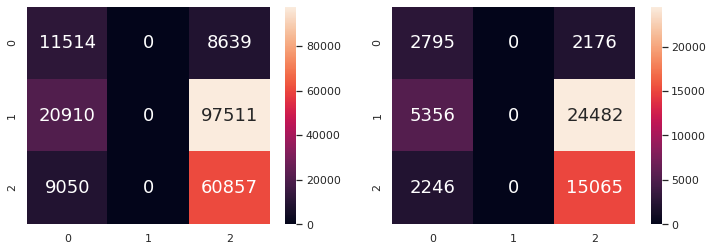

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
other_floor_type = pd.DataFrame(mlb.fit_transform(catData['other_floor_type']),columns=mlb.classes_)

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = other_floor_type

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#position

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'max_depth': 2}
2
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5689055597392568

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.568937068303914

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5057
           2       0.57      1.00      0.73     29653
           3       0.00      0.00      0.00     17410

    accuracy                           0.57     52120
   macro avg       0.19      0.33      0.24     52120
weighted avg       0.32      0.57      0.41     52120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


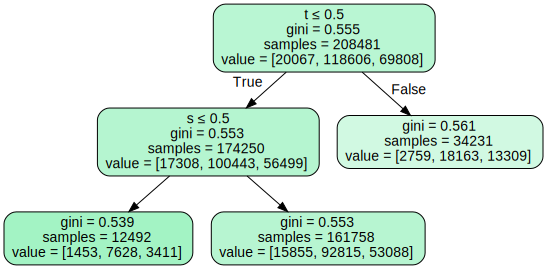

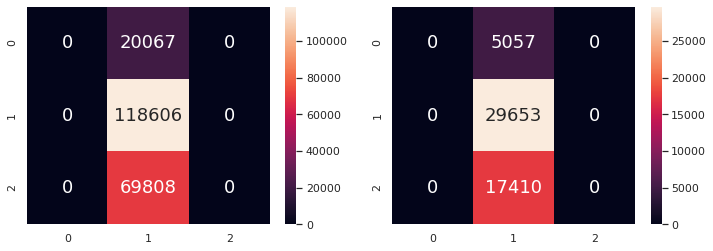

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
position_type = pd.DataFrame(mlb.fit_transform(catData['position']),columns=mlb.classes_)

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y_position = pd.DataFrame(df3['damage_grade'])
X_position = pd.DataFrame(position_type)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
Xland_train, Xland_test, yland_train, yland_test = train_test_split(X_position, y_position, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': range(2, 11)}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params)                  

locally_best_tree.fit(Xland_train, yland_train)
print("Best parameters:", locally_best_tree.best_params_)
best_param = locally_best_tree.best_params_['max_depth']
print(best_param)
graphviz.Source(treedot)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = best_param)  # create the decision tree object
dectree.fit(Xland_train, yland_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
yland_train_pred = dectree.predict(Xland_train)
yland_test_pred = dectree.predict(Xland_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_train, yland_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_test, yland_test))
print()

#Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(yland_test, yland_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(yland_train, yland_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yland_test, yland_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = Xland_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript
graphviz.Source(treedot)

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5223065890896532

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5214504988488105

Accuracy: 0.5214504988488105
              precision    recall  f1-score   support

           1       0.13      0.07      0.09     20099
           2       0.58      0.79      0.67    118623
           3       0.39      0.19      0.26     69759

    accuracy                           0.52    208481
   macro avg       0.36      0.35      0.34    208481
weighted avg       0.47      0.52      0.47    208481

              precision    recall  f1-score   support

           1       0.13      0.07      0.09      5025
           2       0.57      0.79      0.67     29636
           3       0.39      0.19      0.26     17459

    accuracy                           0.52     52120
   macro avg       0.36      0.35      0.34     52120
weighted avg       0.47      0.52

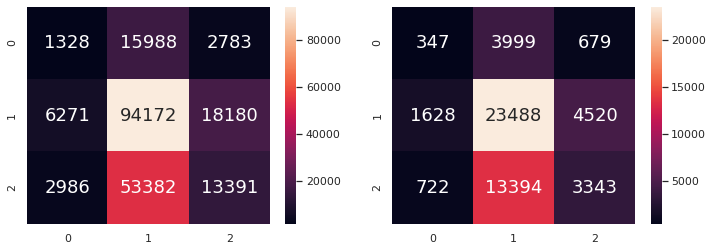

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
position_type = pd.DataFrame(mlb.fit_transform(catData['position']),columns=mlb.classes_)

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = position_type

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#plan_configuration

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'max_depth': 2}
2
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.568756865133993

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5695318495778972

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4964
           2       0.57      1.00      0.73     29684
           3       0.00      0.00      0.00     17472

    accuracy                           0.57     52120
   macro avg       0.19      0.33      0.24     52120
weighted avg       0.32      0.57      0.41     52120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


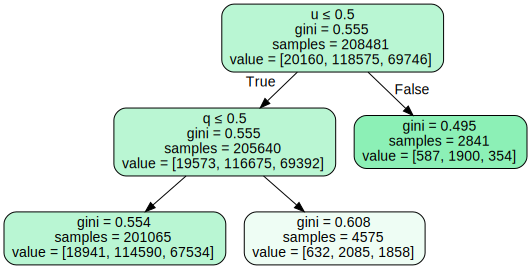

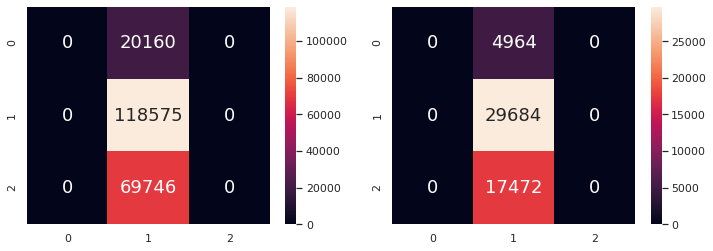

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
plan_type = pd.DataFrame(mlb.fit_transform(catData['plan_configuration']),columns=mlb.classes_)

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y_plan = pd.DataFrame(df3['damage_grade'])
X_plan = pd.DataFrame(plan_type)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
Xland_train, Xland_test, yland_train, yland_test = train_test_split(X_plan, y_plan, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': range(2, 11)}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params)                  

locally_best_tree.fit(Xland_train, yland_train)
print("Best parameters:", locally_best_tree.best_params_)
best_param = locally_best_tree.best_params_['max_depth']
print(best_param)
graphviz.Source(treedot)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = best_param)  # create the decision tree object
dectree.fit(Xland_train, yland_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
yland_train_pred = dectree.predict(Xland_train)
yland_test_pred = dectree.predict(Xland_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_train, yland_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Xland_test, yland_test))
print()

#Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(yland_test, yland_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(yland_train, yland_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yland_test, yland_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = Xland_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript
graphviz.Source(treedot)

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.3303898196957996

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3297966231772832

Accuracy: 0.3297966231772832
              precision    recall  f1-score   support

           1       0.17      0.07      0.10     20117
           2       0.73      0.00      0.00    118605
           3       0.34      0.97      0.50     69759

    accuracy                           0.33    208481
   macro avg       0.41      0.35      0.20    208481
weighted avg       0.55      0.33      0.18    208481

              precision    recall  f1-score   support

           1       0.17      0.07      0.10      5007
           2       0.71      0.00      0.00     29654
           3       0.34      0.96      0.50     17459

    accuracy                           0.33     52120
   macro avg       0.41      0.34      0.20     52120
weighted avg       0.54      0.33

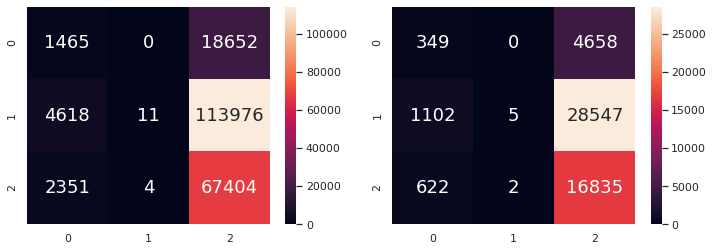

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
plan_type = pd.DataFrame(mlb.fit_transform(catData['plan_configuration']),columns=mlb.classes_)

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = plan_type

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#All Categorical

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.585084492111991

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5801419800460476

              precision    recall  f1-score   support

           1       0.60      0.28      0.38     20180
           2       0.59      0.93      0.72    118551
           3       0.54      0.08      0.14     69750

    accuracy                           0.59    208481
   macro avg       0.58      0.43      0.41    208481
weighted avg       0.57      0.59      0.49    208481

              precision    recall  f1-score   support

           1       0.56      0.25      0.35      4944
           2       0.58      0.93      0.72     29708
           3       0.51      0.07      0.13     17468

    accuracy                           0.58     52120
   macro avg       0.55      0.42  

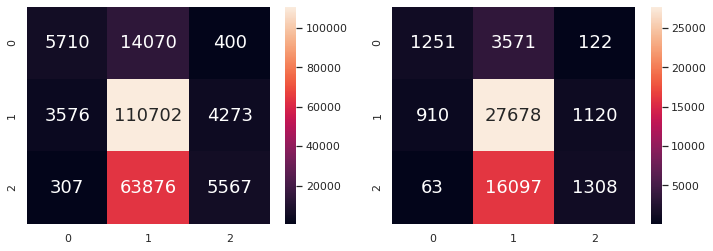

In [0]:
# Model Correct #PASSS
# Decision Tree
# Without Categorical Data Decision Tree 
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

cat_data = pd.DataFrame(pd.get_dummies(catData, columns=catData.columns, drop_first=True))

# Extract Response and Predictors
yui_land = pd.DataFrame(df3['damage_grade'])
Xui_land = pd.DataFrame(cat_data)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xui_land, yui_land, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': [2,4,None],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2']}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(),
                                 tree_params)                  

locally_best_tree.fit(X_train, y_train)
print("Best parameters:", locally_best_tree.best_params_)


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = None,
                                 criterion = locally_best_tree.best_params_['criterion'],
                                 max_features = locally_best_tree.best_params_['max_features'])  # create the decision tree object
# train the decision tree model
dectree.fit(X_train, y_train)                   

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

#Classification Metrics
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



In [0]:
# Random Forest
# Categorical Data ONLY Random Forest

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y93sd = pd.DataFrame(df3['damage_grade'])
X93sd = pd.DataFrame(pd.get_dummies(catData, columns=catData.columns, drop_first=True))

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X93sd_train, X93sd_test, y93sd_train, y93sd_test = train_test_split(X93sd, y93sd, test_size = no)

#Best Param Models
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(n_estimators = 10, n_jobs=-1)
param_grid = { 
    'n_estimators': [10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,None],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
CV_rfc.fit(X93sd_train, y93sd_train.values.ravel())
print((CV_rfc.best_params_))

# Decision Tree using Train Data
rfc = RandomForestClassifier(max_depth = CV_rfc.best_params_["max_depth"], 
                             n_estimators = CV_rfc.best_params_['n_estimators'], 
                             criterion = CV_rfc.best_params_['criterion'],
                             max_features = CV_rfc.best_params_['max_features'], n_jobs = -1)
                                                                                         # create the decision tree object
rfc.fit(X93sd_train, y93sd_train.values.ravel())                                        # train the decision tree model
estimator = rfc.estimators_[5]


# Predict Response corresponding to Predictors
y93sd_train_pred = rfc.predict(X93sd_train)
y93sd_test_pred = rfc.predict(X93sd_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(X93sd_train, y93sd_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(X93sd_test, y93sd_test))
print()

#Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(y93sd_test, y93sd_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y93sd_train, y93sd_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y93sd_test, y93sd_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(estimator, out_file=None, 
                feature_names = X93sd_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graphviz.Source(treedot)

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.379171243422662

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.38006523407521103

Accuracy: 0.38006523407521103
              precision    recall  f1-score   support

           1       0.31      0.63      0.42     20122
           2       0.67      0.02      0.03    118648
           3       0.39      0.93      0.55     69711

    accuracy                           0.38    208481
   macro avg       0.46      0.52      0.33    208481
weighted avg       0.54      0.38      0.24    208481

              precision    recall  f1-score   support

           1       0.31      0.61      0.41      5002
           2       0.71      0.02      0.03     29611
           3       0.39      0.93      0.55     17507

    accuracy                           0.38     52120
   macro avg       0.47      0.52      0.33     52120
weighted avg       0.56      0.3

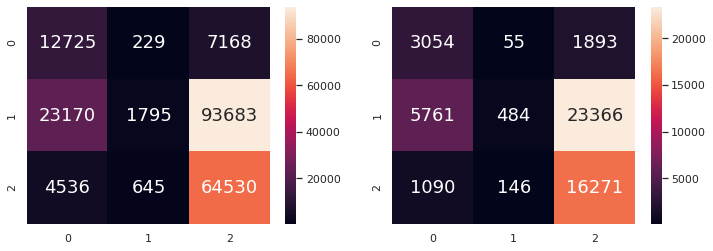

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report



# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(pd.get_dummies(catData, columns=catData.columns, drop_first=True))

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])